In [1]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [2]:
Q = Diagonal([0.5; 1])
function f(x)
    return 0.5*(x-[1; 0])'*Q*(x-[1; 0])
end
function ∇f(x)
    return Q*(x-[1; 0])
end
function ∇2f(x)
    return Q
end

∇2f (generic function with 1 method)

In [3]:
function c(x)
    return (x[1]+3)^2 + (x[2]-3)^2 - 3^2
end
function ∂c(x)
    return [2*x[1]+6 2*x[2]-6]
end

∂c (generic function with 1 method)

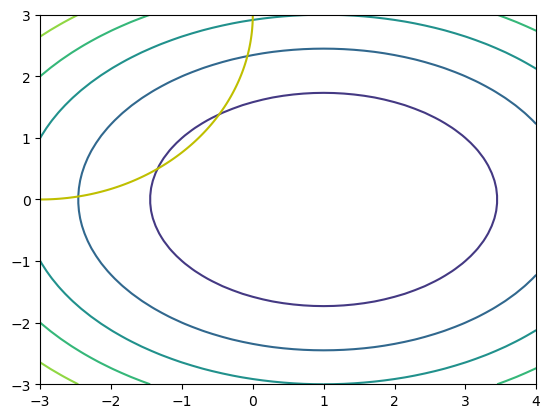

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff750cc0a00>

In [4]:
function plot_landscape()
    Nsamp = 50
    Xsamp = kron(ones(Nsamp),LinRange(-3,4,Nsamp)')
    Ysamp = kron(ones(Nsamp)',LinRange(-3,3,Nsamp))
    Zsamp = zeros(Nsamp,Nsamp)
    for j = 1:Nsamp
        for k = 1:Nsamp
            Zsamp[j,k] = f([Xsamp[j,k]; Ysamp[j,k]])
        end
    end
    contour(Xsamp,Ysamp,Zsamp)

    θ = LinRange(-pi/2,0,100)
    plot(3*cos.(θ).-3,3*sin.(θ).+3,"y")
end

plot_landscape()

In [8]:
function newton_step(x0,λ0)
    H = ∇2f(x0) + ForwardDiff.jacobian(x -> ∂c(x)'*λ0, x0)
    C = ∂c(x0)
    Δz = [H C'; C 0]\[-∇f(x0)-C'*λ0; -c(x0)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return x0+Δx, λ0+Δλ
end

newton_step (generic function with 1 method)

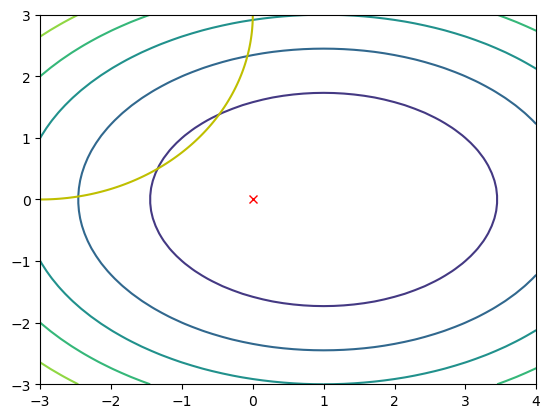

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff751ca4ca0>

In [9]:
xguess = [0; 0]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

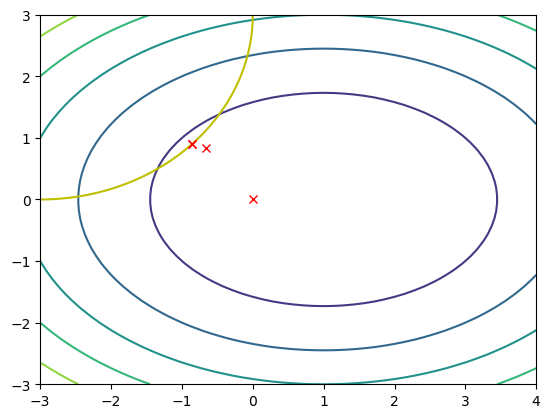

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff754335430>

In [12]:
xnew, λnew = newton_step(xguess[:,end],λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")

In [13]:
function gauss_newton_step(x0,λ0)
    H = ∇2f(x0)
    C = ∂c(x0)
    Δz = [H C'; C 0]\[-∇f(x0)-C'*λ0; -c(x0)]
    Δx = Δz[1:2]
    Δλ = Δz[3]
    return x0+Δx, λ0+Δλ
end

gauss_newton_step (generic function with 1 method)

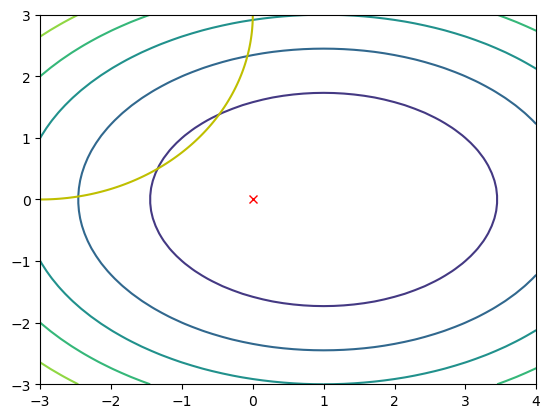

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff7544834c0>

In [14]:
xguess = [0; 0]
λguess = [0.0]
plot_landscape()
plot(xguess[1], xguess[2], "rx")

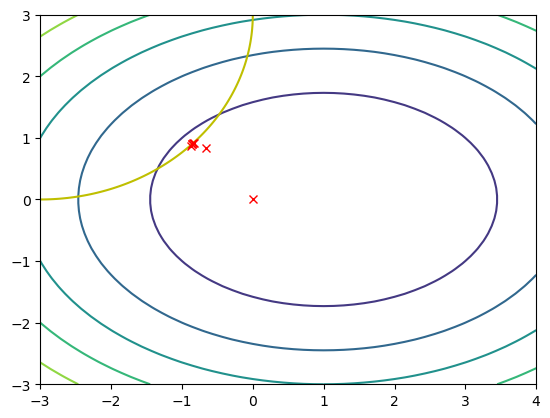

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff7556b6970>

In [20]:
xnew, λnew = gauss_newton_step(xguess[:,end],λguess[end])
xguess = [xguess xnew]
λguess = [λguess λnew]
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")